In [1]:
#I will analyze Price Data for the cryptocurrency Bitcoin (BTC) in 2021.
#I have fetched the data from https://finance.yahoo.com/quote/BTC-USD/history.

#Import Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats
import seaborn as sns


In [2]:
#Let's start by importing BTC data, treating the first column as the index and parsing the dates.

df = pd.read_csv('/Users/davidgomez/Desktop/BTC Python Project Data/BTC-USD_2021_Historical_Price_Data.csv',
                 index_col=0,
                 parse_dates= True
)

df.head()


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-01-01,28994.009766,29600.626953,28803.585938,29374.152344,29374.152344,4.073030e+10
2021-01-02,29376.455078,33155.117188,29091.181641,32127.267578,32127.267578,6.786542e+10
2021-01-03,32129.408203,34608.558594,32052.316406,32782.023438,32782.023438,7.866524e+10
2021-01-04,32810.949219,33440.218750,28722.755859,31971.914063,31971.914063,8.116348e+10
2021-01-05,31977.041016,34437.589844,30221.187500,33992.429688,33992.429688,6.754732e+10


In [3]:
#Once the Database has been successfully imported and the Dataframe (df) has been created,
#let's now explore the Dataframe.

df.describe() #having a look at the basic statistics of the DataFrame.
df.shape
df.info()

#The Dataframe contains 366 rows and 6 columns. The info() function appears to indicate there are 4 missing
#values. Let's verify this.

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 366 entries, 2021-01-01 to 2022-01-01
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       362 non-null    float64
 1   High       362 non-null    float64
 2   Low        362 non-null    float64
 3   Close      362 non-null    float64
 4   Adj Close  362 non-null    float64
 5   Volume     362 non-null    float64
dtypes: float64(6)
memory usage: 20.0 KB


In [4]:
df.isnull().values.any() #There are null values. Let's now identify these.

True

<AxesSubplot:xlabel='Date'>

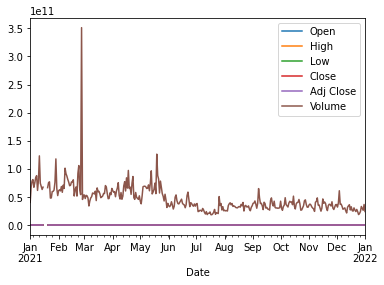

In [8]:
df.plot() #There seems to be a discontinuity of values in mid-January. Let's zoom in those dates.

<AxesSubplot:xlabel='Date'>

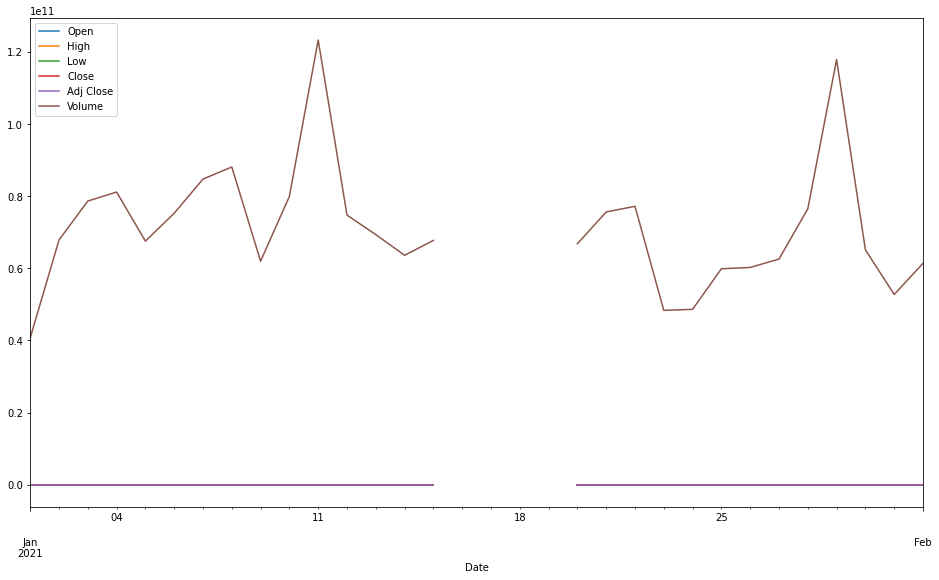

In [9]:
df.loc['2021-01-01' : '2021-02-01'].plot(figsize=(16,9)) #it's clear now that there is missing data
#between January,15 and January,19. Let's handle this.

In [10]:
#I could either choose to drop the rows with missing values or to fill them with. In this case,
#we could benefit from those values. We could presume that the values stayed the same and use previous values
#to fill the blanks forward. I will also make the changes permanent.

df.loc['2021-01-15': '2021-01-19'] = df.loc['2021-01-15': '2021-01-19'].fillna(method='ffill')


<AxesSubplot:xlabel='Date'>

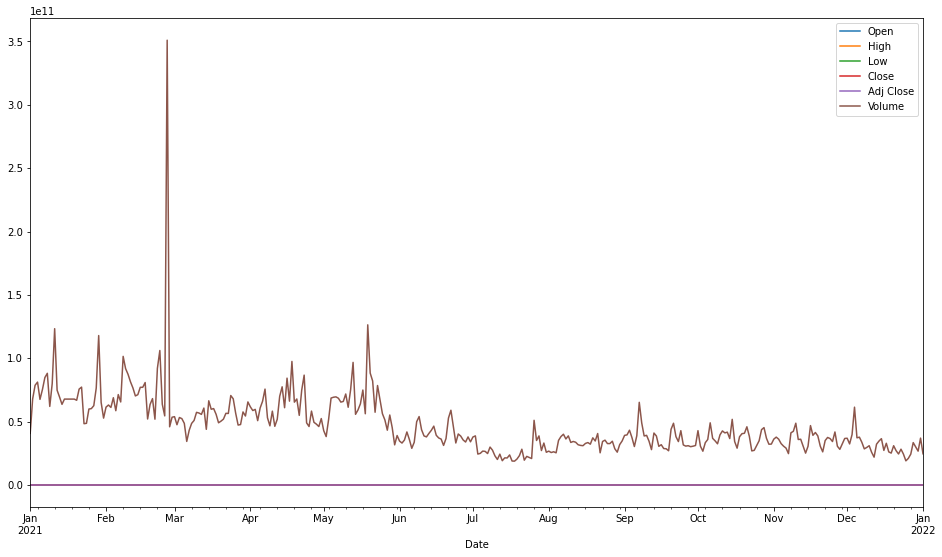

In [11]:
df.plot(figsize=(16,9)) #no discontinuities of values observed. The nulls have been handled.


In [12]:
#We will now drop the 'Open', 'Close, 'High', and 'Low' columns
#and will take the 'Adj Close' column as representative of the daily price of BTC.

df = df.drop(columns=['Open','High','Low','Close'])
df.head()


,Adj Close,Volume
Date,,
2021-01-01,29374.152344,4.073030e+10
2021-01-02,32127.267578,6.786542e+10
2021-01-03,32782.023438,7.866524e+10
2021-01-04,31971.914063,8.116348e+10
2021-01-05,33992.429688,6.754732e+10


In [13]:
#Let's now rename the 'Adj Close' as 'Price' to make it more intuitive.

df = df.rename(columns={'Adj Close':'Price'})
df.head()

,Price,Volume
Date,,
2021-01-01,29374.152344,4.073030e+10
2021-01-02,32127.267578,6.786542e+10
2021-01-03,32782.023438,7.866524e+10
2021-01-04,31971.914063,8.116348e+10
2021-01-05,33992.429688,6.754732e+10


In [16]:
#Let's now analyze the central tendency of the BTC Price.

round(df['Price'].mean(),2)     #Calculate the mean, rounded to two decimals.



47444.81

In [15]:
round(df['Price'].median(),2)   #Calculate the median, rounded to two decimals.

47747.42

In [17]:
#Both the mean (47,444.81) and the median (47,747.42) are close together. Thus, we can conclude that the data
#follows a somewhat symmetrical distribution in 2021.

<AxesSubplot:ylabel='Frequency'>

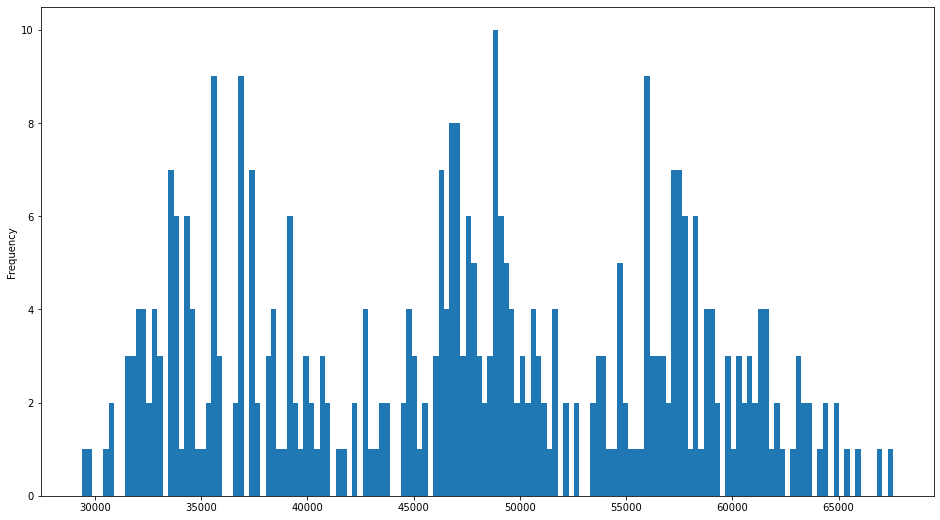

In [18]:
df['Price'].plot(kind= 'hist', bins=150, figsize=(16,9)) #Visualizing the distribution with a histogram.


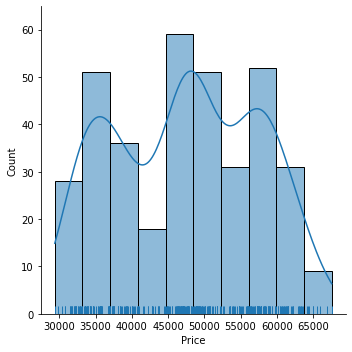

In [33]:
#Visualizing a histogram using Seaborn's distplot, that plots a histogram,
#a KDE and a rugplot.

sns.displot(df['Price'], rug=True, kde=True)

<AxesSubplot:xlabel='Price', ylabel='Volume'>

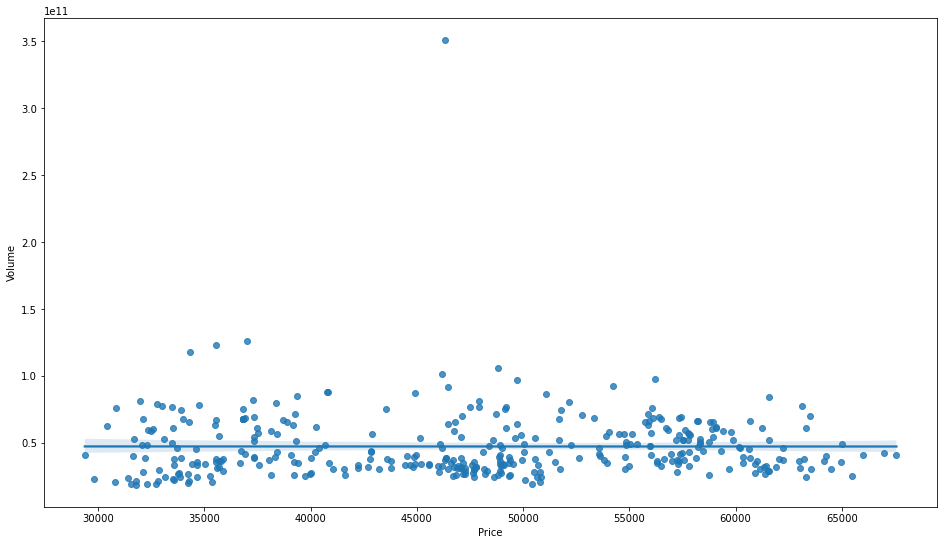

In [23]:
#Visualizing a Scatterplot using Seaborn's regplot to see the relationship between the Price and Volume of BTC.

fig, ax = plt.subplots(figsize = (16,9))
sns.regplot(x='Price', y='Volume', data=df, ax=ax)


In [24]:
#There does not seem to be a relationship between the two variables. Let's calculate the Pearson's
#Correlation Coefficient to verify this.

r, p = scipy.stats.pearsonr(df['Price'],df['Volume'])
print(r)

#After obtaining a value of r of -0.00056, we can conclude that there is a very weak, almost inexistent,
#linear relationship between the Price and Volume of BTC.

-0.0005585000242199489


In [25]:
#Analytical Analysis of invalid values.

#I will analyze those values that seem invalid. I will use IQRs (InterQuartile Range), as this is not
#so sensitive to outliers.

iqr = df['Price'].quantile(.75) - df['Price'].quantile(.25)
iqr #IQR equals 17,837.61 USD.

17837.61035175

In [26]:
#Let's now calculate the Z scores, both above and below the mean.

upper_limit = df['Price'].mean() + 2 * iqr
lower_limit = df['Price'].mean() - 2 * iqr
print(upper_limit)
print(lower_limit)

83120.02718413383
11769.585777133812


/Users/davidgomez/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


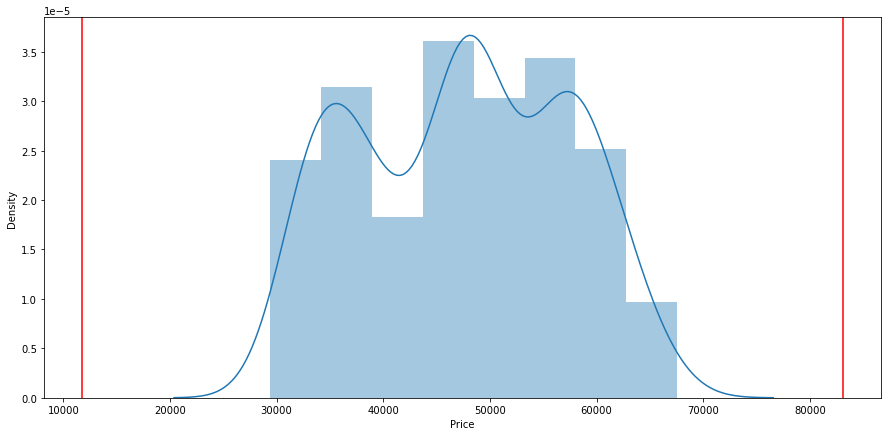

In [41]:
#Let's plot the lower and upper limit as vertical lines in the Seaborn chart.

fig, ax = plt.subplots(figsize=(15, 7))
sns.distplot(df['Price'], ax=ax)
ax.axvline(lower_limit, color='red')
ax.axvline(upper_limit, color='red')


In [32]:
#According to the plot, anything above 83,120 USD is considered an invalid value.